In [1]:
import pandas as pd
import numpy as np
from sklearn.covariance import GraphicalLasso
import matplotlib.pyplot as plt
import networkx as nx

In [7]:
# 加载数据集
data = pd.read_csv('D:\code\HiSCoD\db_hiscod_csv_v1_en.csv', sep=';')
data_france = data[data['country_name'] == 'France']
data_england =  data[data['country_name'] == 'England']

C:\Users\Windows\AppData\Local\Temp\ipykernel_25564\2521849864.py:2: DtypeWarning: Columns (14,20,34,37,39,41,43,45,46,47,48,49,50,51,52,53,54,55,57,63,64,65,66) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('D:\code\HiSCoD\db_hiscod_csv_v1_en.csv', sep=';')


In [21]:
variables_with_year = ['city_latitude', 'city_longitude', 'year', 'riot_type_hiscod_num', 'admin_level_2']
gmm_data_france = data_france[variables_with_year].dropna()

In [32]:
gmm_data_france['decade'] = (gmm_data_france['year'] // 10) * 10
top_cities = gmm_data_france['admin_level_2'].value_counts().head(20).index
top20_gmm_data_france = gmm_data_france[gmm_data_france['admin_level_2'].isin(top_cities)]
result = top20_gmm_data_france.pivot_table(index='admin_level_2', columns='decade', aggfunc='size', fill_value=0)
X_Fr = result


In [103]:
X_Fr.index

Index(['Aisne', 'Ardèche', 'Aveyron', 'Bouches-du-Rhône', 'Calvados', 'Eure',
       'Gard', 'Gironde', 'Hérault', 'Loire-Atlantique', 'Maine-et-Loire',
       'Manche', 'Mayenne', 'Orne', 'Paris', 'Puy-de-Dôme', 'Rhône',
       'Saône-et-Loire', 'Seine-Maritime', 'Somme'],
      dtype='object', name='admin_level_2')

In [58]:
from sklearn.model_selection import GridSearchCV

# 定义参数网格
param_grid = {'alpha': np.logspace(-0.2, 2, 10)}

# 使用GridSearchCV进行超参数选择
model_france_with_year = GraphicalLasso()
grid_search = GridSearchCV(model_france_with_year, param_grid, cv=5)
grid_search.fit(X_Fr)

# 输出最优参数
best_alpha = grid_search.best_params_['alpha']
print(f"Best alpha for France: {best_alpha}")



C:\Users\Windows\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\covariance\_graph_lasso.py:139: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1415.4029048112627, tolerance: 0.0
  coefs, _, _, _ = cd_fast.enet_coordinate_descent_gram(
C:\Users\Windows\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\covariance\_graph_lasso.py:163: RuntimeWarning: divide by zero encountered in scalar divide
  precision_[idx, idx] = 1.0 / (
C:\Users\Windows\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\covariance\_graph_lasso.py:167: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = -precision_[idx, idx] * coefs
C:\Users\Windows\AppData\Local\Package

Best alpha for France: 0.6309573444801932


C:\Users\Windows\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\covariance\_graph_lasso.py:191: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: 4.072e-02
  warnings.warn(


In [59]:
best_alpha

0.6309573444801932

In [61]:

model_france_with_year = GraphicalLasso(alpha=best_alpha)
model_france_with_year.fit(X_Fr)
precision_matrix_france_with_year = model_france_with_year.precision_

C:\Users\Windows\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\covariance\_graph_lasso.py:139: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 110.68928429398511, tolerance: 6.417642750000001
  coefs, _, _, _ = cd_fast.enet_coordinate_descent_gram(
C:\Users\Windows\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\covariance\_graph_lasso.py:139: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 148.37586904171621, tolerance: 29.561717169999998
  coefs, _, _, _ = cd_fast.enet_coordinate_descent_gram(
C:\Users\Windows\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\covariance\_graph_lasso.py:139: ConvergenceWarni

In [62]:
precision_matrix_france_with_year

array([[ 4.22513083e+01, -0.00000000e+00, -0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00, -0.00000000e+00],
       [-0.00000000e+00,  4.22506770e+01, -0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00, -0.00000000e+00],
       [-0.00000000e+00, -0.00000000e+00,  8.76053132e+00, ...,
        -0.00000000e+00, -0.00000000e+00,  0.00000000e+00],
       ...,
       [ 0.00000000e+00,  0.00000000e+00, -0.00000000e+00, ...,
         9.80840663e-02, -6.48158202e-02, -1.78233055e-02],
       [ 0.00000000e+00,  0.00000000e+00, -0.00000000e+00, ...,
        -6.48158202e-02,  2.23807876e-01, -1.91763875e-02],
       [-0.00000000e+00, -0.00000000e+00,  0.00000000e+00, ...,
        -1.78233055e-02, -1.91763875e-02,  1.57058372e-01]])

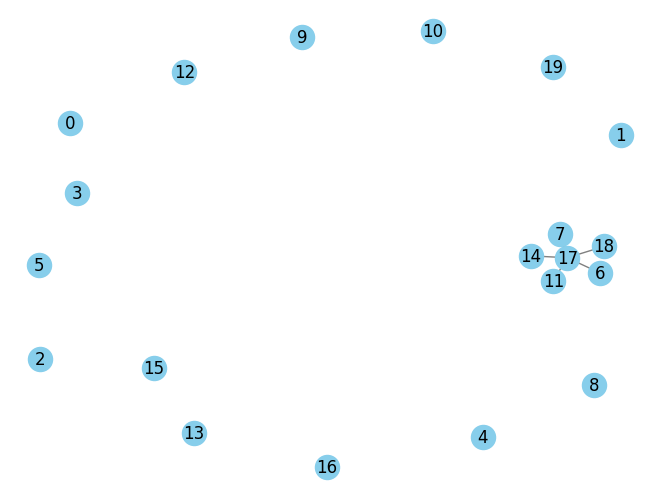

In [63]:
import networkx as nx
import matplotlib.pyplot as plt

# 创建图
graph = nx.Graph()

# 添加节点
n_features = 20
graph.add_nodes_from(range(n_features))

# 添加边（根据精度矩阵）
for i in range(n_features):
    for j in range(i + 1, n_features):
        if precision_matrix_france_with_year[i, j] != 0:
            graph.add_edge(i, j)

# 绘制图
pos = nx.spring_layout(graph)
nx.draw(graph, pos, with_labels=True, node_size=300, node_color='skyblue', edge_color='gray')
plt.show()

In [104]:
for i in (6,7,11,14,17,18):
    print(X_Fr.index[i])

Gard
Gironde
Manche
Paris
Saône-et-Loire
Seine-Maritime


In [118]:
X_Fr

decade,1220.0,1230.0,1250.0,1260.0,1280.0,1290.0,1300.0,1310.0,1320.0,1330.0,...,1760.0,1770.0,1780.0,1790.0,1800.0,1810.0,1820.0,1830.0,1840.0,1850.0
admin_level_2,,,,,,,,,,,,,,,,,,,,,
Aisne,0,0,0,0,0,0,0,1,0,2,...,23,39,29,14,8,4,4,5,1,0
Ardèche,0,0,0,0,0,0,0,0,0,0,...,26,12,46,12,27,5,24,21,18,34
Aveyron,0,0,0,0,0,0,0,0,1,1,...,8,7,10,12,31,8,29,34,17,17
Bouches-du-Rhône,0,0,1,2,0,0,0,0,0,0,...,14,9,28,1,17,3,8,14,9,8
Calvados,0,0,0,0,0,0,0,0,0,0,...,13,14,74,149,7,12,4,3,4,3
Eure,0,0,0,0,0,0,0,0,0,0,...,19,33,39,73,9,28,3,1,1,0
Gard,0,0,0,0,0,0,0,0,0,0,...,21,30,47,15,15,10,8,13,4,10
Gironde,0,0,0,0,0,1,1,0,0,0,...,12,42,37,5,16,10,12,6,12,5
Hérault,0,0,0,0,0,0,0,0,1,1,...,18,13,19,1,24,18,19,28,18,26


In [65]:
gmm_data_england = data_england[variables_with_year].dropna()

In [69]:
gmm_data_england['decade'] = (gmm_data_england['year'] // 10) * 10
top_cities_eng = gmm_data_england['admin_level_2'].value_counts().head(20).index
top20_gmm_data_england = gmm_data_england[gmm_data_england['admin_level_2'].isin(top_cities_eng)]
result = top20_gmm_data_england.pivot_table(index='admin_level_2', columns='decade', aggfunc='size', fill_value=0)
X_En = result

In [77]:
# 定义参数网格
param_grid_en = {'alpha': np.logspace(-0.7, 1, 10)}

# 使用GridSearchCV进行超参数选择
model_england_with_year = GraphicalLasso()
grid_search_england = GridSearchCV(model_england_with_year, param_grid_en, cv=5)
grid_search_england.fit(X_En)

# 输出最优参数
best_alpha_england = grid_search_england.best_params_['alpha']
print(f"Best alpha for England: {best_alpha_england}")



C:\Users\Windows\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\covariance\_graph_lasso.py:139: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  coefs, _, _, _ = cd_fast.enet_coordinate_descent_gram(
C:\Users\Windows\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\covariance\_graph_lasso.py:163: RuntimeWarning: divide by zero encountered in scalar divide
  precision_[idx, idx] = 1.0 / (
C:\Users\Windows\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\covariance\_graph_lasso.py:167: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = -precision_[idx, idx] * coefs
C:\Users\Windows\AppData\Local\Packages\PythonSoftwar

Best alpha for England: 0.19952623149688797


C:\Users\Windows\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\covariance\_graph_lasso.py:191: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: 2.579e-01
  warnings.warn(


In [80]:
best_alpha_england

0.19952623149688797

In [79]:

model_england_with_year = GraphicalLasso(alpha=best_alpha_england)
model_england_with_year.fit(X_En)
precision_matrix_england_with_year = model_england_with_year.precision_

C:\Users\Windows\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\covariance\_graph_lasso.py:139: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2333.4862355273735, tolerance: 0.79715534
  coefs, _, _, _ = cd_fast.enet_coordinate_descent_gram(
C:\Users\Windows\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\covariance\_graph_lasso.py:139: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 590.0956665898052, tolerance: 0.5808015493750002
  coefs, _, _, _ = cd_fast.enet_coordinate_descent_gram(
C:\Users\Windows\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\covariance\_graph_lasso.py:139: ConvergenceWarning: Obje

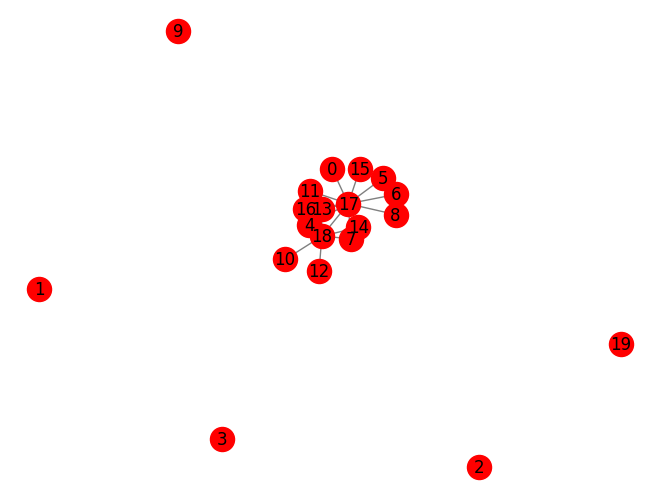

In [116]:
# 创建图
graph_en = nx.Graph()

# 添加节点
n_features = 20
graph_en.add_nodes_from(range(n_features))

# 添加边（根据精度矩阵）
for i in range(n_features):
    for j in range(i + 1, n_features):
        if precision_matrix_england_with_year[i, j] != 0:
            graph_en.add_edge(i, j)

# 绘制图
pos = nx.spring_layout(graph_en)
nx.draw(graph_en, pos, with_labels=True, node_size=300, node_color='red', edge_color='gray')
plt.show()

In [117]:
for i in (1,2,3,9,19,17):
    print(X_En.index[i])

Broadland
Buckinghamshire
Canterbury
King's Lynn and West Norfolk
Wiltshire
West Berkshire


In [109]:
X_En

decade,1340.0,1430.0,1560.0,1580.0,1590.0,1610.0,1620.0,1630.0,1640.0,1650.0,...,1800.0,1810.0,1820.0,1830.0,1840.0,1850.0,1860.0,1870.0,1880.0,1890.0
admin_level_2,,,,,,,,,,,,,,,,,,,,,
Breckland,1,0,0,0,0,0,0,0,0,0,...,0,0,7,39,0,0,0,0,0,0
Broadland,0,0,0,0,0,0,0,0,0,0,...,0,0,0,55,0,0,0,0,0,0
Buckinghamshire,0,0,0,0,0,0,0,0,0,1,...,0,0,0,33,0,0,0,0,0,0
Canterbury,0,0,0,0,1,0,0,3,0,0,...,0,0,0,32,0,0,0,0,0,0
Cornwall,0,0,0,0,0,0,0,0,0,0,...,0,4,0,11,3,0,0,0,0,0
Dorset,0,0,0,0,0,0,0,2,0,0,...,0,1,0,53,0,0,0,0,0,0
Dover,0,0,0,1,0,0,1,0,0,0,...,0,0,0,52,0,0,0,0,0,0
East Suffolk,0,1,0,0,0,0,0,0,0,0,...,0,1,5,30,0,0,0,0,0,0
Huntingdonshire,0,0,0,0,0,0,0,0,0,0,...,0,1,0,31,0,0,0,0,0,0


In [110]:
X_Fr

decade,1220.0,1230.0,1250.0,1260.0,1280.0,1290.0,1300.0,1310.0,1320.0,1330.0,...,1760.0,1770.0,1780.0,1790.0,1800.0,1810.0,1820.0,1830.0,1840.0,1850.0
admin_level_2,,,,,,,,,,,,,,,,,,,,,
Aisne,0,0,0,0,0,0,0,1,0,2,...,23,39,29,14,8,4,4,5,1,0
Ardèche,0,0,0,0,0,0,0,0,0,0,...,26,12,46,12,27,5,24,21,18,34
Aveyron,0,0,0,0,0,0,0,0,1,1,...,8,7,10,12,31,8,29,34,17,17
Bouches-du-Rhône,0,0,1,2,0,0,0,0,0,0,...,14,9,28,1,17,3,8,14,9,8
Calvados,0,0,0,0,0,0,0,0,0,0,...,13,14,74,149,7,12,4,3,4,3
Eure,0,0,0,0,0,0,0,0,0,0,...,19,33,39,73,9,28,3,1,1,0
Gard,0,0,0,0,0,0,0,0,0,0,...,21,30,47,15,15,10,8,13,4,10
Gironde,0,0,0,0,0,1,1,0,0,0,...,12,42,37,5,16,10,12,6,12,5
Hérault,0,0,0,0,0,0,0,0,1,1,...,18,13,19,1,24,18,19,28,18,26
